In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import random
import seaborn as sns
import numpy as np

#importing  TSNE
from sklearn.manifold import TSNE

In [6]:
original_data = pd.read_csv("data/ObesityDataSet.csv")
original_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
data = original_data.copy()
data = data.replace({"yes": 1, "no": 0, "Sometimes": 0.25, "Frequently": 0.75, "Always": 1, "Male": 1, "Female": 0})
mtrans = ["Automobile", "Public_Transportation", "Motorbike", "Bike", "Walking"]
for i in mtrans:
    data[i] = 0
    data.loc[data["MTRANS"] == i, i] = 1
data.drop(columns=["MTRANS", "NObeyesdad"], inplace=True)
data 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Public_Transportation,Motorbike,Bike,Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0.25,0,2.000000,0,0.000000,1.000000,0.00,0,1,0,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,0.25,1,3.000000,1,3.000000,0.000000,0.25,0,1,0,0,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0.25,0,2.000000,0,2.000000,1.000000,0.75,0,1,0,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0.25,0,2.000000,0,2.000000,0.000000,0.75,0,0,0,0,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0.25,0,2.000000,0,0.000000,0.000000,0.25,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0.25,0,1.728139,0,1.676269,0.906247,0.25,0,1,0,0,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0.25,0,2.005130,0,1.341390,0.599270,0.25,0,1,0,0,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0.25,0,2.054193,0,1.414209,0.646288,0.25,0,1,0,0,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0.25,0,2.852339,0,1.139107,0.586035,0.25,0,1,0,0,0


In [8]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(data)
standard_data = pd.DataFrame(data_scaled, columns=data.columns)
standard_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Public_Transportation,Motorbike,Bike,Walking
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.353309,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.233942,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,-0.353309,6.853997,1.618759,4.581439,2.339750,-1.080625,0.378969,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.353309,-0.145900,-0.013073,-0.218272,1.163820,0.561997,3.604792,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.353309,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,3.604792,-0.525642,-1.724969,-0.072375,-0.05768,6.057758
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.353309,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.378969,-0.525642,0.579721,-0.072375,-0.05768,-0.165078


In [9]:
tsne = TSNE(n_components = 2, random_state = 1)    # Applying the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(standard_data)      # Fitting and transforming tsne function on the scaled data
data_tsne = pd.DataFrame({"Param1" : data_tsne[:, 0], "Param2" : data_tsne[:, 1]})  # Conversion to dataframe

data_tsne.head()

,Param1,Param2
0,4.932301,25.342035
1,-13.882968,15.271078
2,2.727084,16.438276
3,26.063828,51.865047
4,9.676523,17.677881


In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted = dbscan.fit_predict(data_tsne)
data_tsne['cluster'] = predicted
original_data["cluster"] = predicted

data_tsne

,Param1,Param2,cluster
0,4.932301,25.342035,-1
1,-13.882968,15.271078,-1
2,2.727084,16.438276,-1
3,26.063828,51.865047,-1
4,9.676523,17.677881,-1
...,...,...,...
2106,-1.525903,-52.781513,17
2107,-4.225165,-55.043186,-1
2108,-4.278221,-55.031757,-1
2109,-16.910213,-61.741066,-1


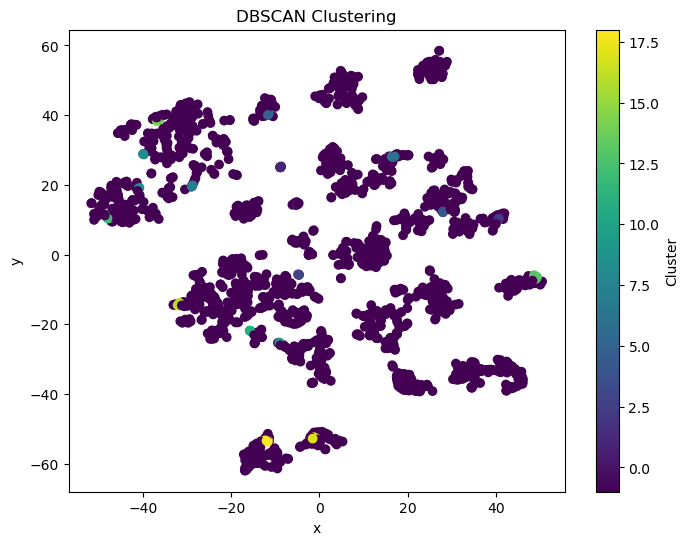

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne['Param1'], data_tsne['Param2'], c=data_tsne['cluster'], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()